In [2]:
#pip install tensorflow-gpu

In [1]:
# -*- coding: utf-8 -*-
"""ResNet Animals.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1zDOhXuZAmwt3ir8vMi2HYUcG_v64XZqi
"""
from tqdm import tqdm
from numpy import asarray
import tensorflow as tf
import keras
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50

#from keras.applications.resnet import ResNet50
#from keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import decode_predictions
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,UpSampling2D,Flatten,BatchNormalization,Dense,Dropout,GlobalAveragePooling2D
from tensorflow.keras import optimizers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
from PIL import Image
import pandas as pd
import os
import cv2



In [2]:
IMAGE_SIZE = [384, 384]

train_path = r'C:\Users\manju\Desktop\ml-project\train_A'
test_path = 'dataset/sampleTrain'

folders = glob(train_path+'/*')
print("Number of classes:",len(folders))
num_classes = len(folders)
nb_epochs = 100

resnet=ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Fixed for our dataset
NUM_CLASSES = num_classes

# Fixed for Cats & Dogs color images
CHANNELS = 3

IMAGE_RESIZE = 384
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
#NUM_EPOCHS = 60
#EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 2

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 32
BATCH_SIZE_VALIDATION =16

from tensorflow.keras.models import Model,Sequential
model4 = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model4.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model4.add(Dense(num_classes, activation = 'softmax'))

# Say not to train first layer (ResNet) model as it is already trained
model4.layers[0].trainable = False

model4.summary()

from tensorflow.keras import optimizers

sgd = optimizers.SGD(learning_rate = 0.001, decay = 1e-6, momentum = 0.9, nesterov = True)
model4.compile(optimizer = sgd, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


# Data Augmentation
test_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        train_path,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')


validation_generator = data_generator.flow_from_directory(
        test_path,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical')

history = model4.fit(
        train_generator,
        epochs = nb_epochs,
        validation_data=validation_generator#,
    #steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
    #validation_steps=STEPS_PER_EPOCH_VALIDATION
        
        )

model4.save("fullData_1_classification_using_resnet50.h5")
print("Saved model to disk")

df = pd.DataFrame(history.history)
df.to_csv('fullData_1_Resnet50history.csv',index = False)

Number of classes: 3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________
Found 9900 images belonging to 3 classes.
Found 324 images belonging to 3 classes.
Epoch 1/100
310/310 [==============================] - 668s 2s/step - loss: 0.4685 - accuracy: 0.8208 - val_loss: 0.4591 - val_accuracy: 0.8364
Epoch 2/100
310/310 [==============================] - 698s 2s/step - loss: 0.3567 - accuracy: 0.8680 - val_loss: 0.4650 - val_accuracy: 0.8426
Epoch 3/100
310/310 [=======================

310/310 [==============================] - 656s 2s/step - loss: 0.2057 - accuracy: 0.9214 - val_loss: 0.7110 - val_accuracy: 0.7438
Epoch 53/100
310/310 [==============================] - 656s 2s/step - loss: 0.2081 - accuracy: 0.9234 - val_loss: 0.6157 - val_accuracy: 0.7870
Epoch 54/100
310/310 [==============================] - 656s 2s/step - loss: 0.2057 - accuracy: 0.9202 - val_loss: 0.5796 - val_accuracy: 0.7963
Epoch 55/100
310/310 [==============================] - 654s 2s/step - loss: 0.2031 - accuracy: 0.9248 - val_loss: 0.6135 - val_accuracy: 0.7809
Epoch 56/100
310/310 [==============================] - 657s 2s/step - loss: 0.2022 - accuracy: 0.9251 - val_loss: 0.6022 - val_accuracy: 0.7840
Epoch 57/100
310/310 [==============================] - 654s 2s/step - loss: 0.2054 - accuracy: 0.9231 - val_loss: 0.7005 - val_accuracy: 0.7623
Epoch 58/100
310/310 [==============================] - 657s 2s/step - loss: 0.2017 - accuracy: 0.9255 - val_loss: 0.6521 - val_accuracy: 0.762

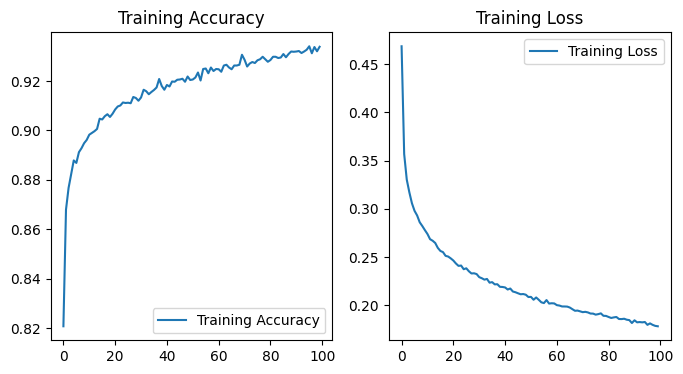

In [4]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(nb_epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [31]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

In [33]:
%cd C:\Users\manju\Desktop\ml-project\save

C:\Users\manju\Desktop\ml-project\save


In [35]:
# serialize model to JSON
model_json = model4.to_json()
with open("fullData_1_classification_using_resnet50.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model4.save_weights("fullData_1_classification_using_resnet50.h5")
print("Saved model to disk")

Saved model to disk


In [36]:
# load json and create model
json_file = open('fullData_1_classification_using_resnet50.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("fullData_1_classification_using_resnet50.h5")
print("Loaded model from disk")

Loaded model from disk


In [43]:
%pwd

'C:\\Users\\manju\\Desktop\\ml-project\\save'

In [37]:
DIRECTORY= r'C:\Users\manju\Desktop\ml-project\test_A\test'

In [38]:
folders

['C:\\Users\\manju\\Desktop\\ml-project\\train_A\\abw',
 'C:\\Users\\manju\\Desktop\\ml-project\\train_A\\neg',
 'C:\\Users\\manju\\Desktop\\ml-project\\train_A\\pbw']

In [39]:
class_names=['abw','neg','pbw']

In [40]:
d=[]
c=[]

1/1 [==============================] - 1s 1s/step


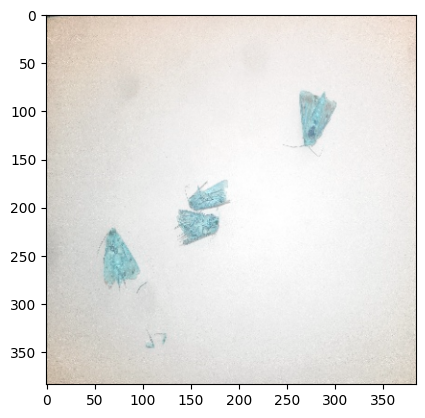

pridiction count= 1
abw= 0
pbw= 0
neg= 1
The predicted class is= neg


In [41]:
count=0
abw=0
pbw=0
neg=0
for img in os.listdir(DIRECTORY):
    img_path=os.path.join(DIRECTORY,img)
    img_array=cv2.imread(img_path)
    img_array=cv2.resize(img_array,(IMAGE_RESIZE,IMAGE_RESIZE))
    img_array_=img_array
    img_array_=np.expand_dims(img_array_,axis=0)
    pred=loaded_model.predict(np.array(img_array_))
    output_class=class_names[np.argmax(pred)]
    #df[count] = output_class
    #print(img)
    #if(output_class!='neg'):
    values = (img[:-4] + "_" + output_class)
    count=count+1
    if(output_class!='neg'):
        if(output_class=='abw'):
            abw+=1
            d.append(values)
            c.append(4)
            d.append(img[:-4] + "_" + "pbw")
            c.append(0)
        else:
            pbw+=1
            d.append(values)
            c.append(4)
            d.append(img[:-4] + "_" + "abw")
            c.append(0)
    else:
        neg+=1
        d.append(img[:-4] + "_" + "abw")
        c.append(0)
        d.append(img[:-4] + "_" + "pbw")
        c.append(0)
        plt.imshow(img_array)
        plt.show()
                     
            
    
#         count+=1
    print('pridiction count=',count)
    print('abw=',abw)
    print('pbw=',pbw)
    print('neg=',neg)
    
     
    #for i in range(100):
    #df3['type'].append(values)# = pd.DataFrame({'type':[values]})
    #df3
    
    
 
 #     for i, r in df3.iterrows():
#         df3.loc[i, 'type'] = values
    
    print('The predicted class is=', output_class)
    break
#     plt.imshow(img_array)
#     plt.show()
#     print("The image ID=",values)
#     break
#     count+=1
#     if(count==25):
#         break
#     if(output_class=='abw'):
#          break



In [42]:
print("% of abw=",(abw/count)*100)
print("% of pbw=",(pbw/count)*100)
print("% of neg=",(neg/count)*100)

% of abw= 0.0
% of pbw= 0.0
% of neg= 100.0


In [27]:
dftemp = pd.DataFrame({'image_id_worm':d,'number_of_worms':c})

In [28]:
dftemp.tail()

image_id_worm  number_of_worms
5601  id_ffbcb27fa549278f47505515_pbw                0
5602  id_ffc0e41e10b0c964d4a02811_abw                0
5603  id_ffc0e41e10b0c964d4a02811_pbw                0
5604  id_fff8c253115aacded09ad7ed_pbw                4
5605  id_fff8c253115aacded09ad7ed_abw                0

In [29]:
dftemp.to_csv('Submission13.2.csv',index=False)

In [21]:
abw = pd.read_csv('abw.csv')  

In [22]:
abw.head()

image_id_worm worm_type  number_of_worms
0  id_001149c0de05ea4941d966e0.jpg       abw                5
1  id_00450e8b229932359e7c32a3.jpg       abw                2
2  id_00773a42b1415d887107663a.jpg       abw                5
3  id_00a90e6639b2983e1ef6244f.jpg       abw                3
4  id_00adaccff7693b67eeb8fdc7.jpg       abw                7

In [23]:
path = "C:/Users/manju/Desktop/ml-project/train_A/abw"

In [24]:
for i in tqdm(range(abw.shape[0])):
    img = cv2.imread('images/'+abw['image_id_worm'][i])
    res = cv2.resize(img, dsize=(400,400))#, interpolation=cv2.INTER_CUBIC)
    #img = tf.keras.utils.load_img('images/'+test['image_id_worm'][i],target_size=None,color_mode='rgb')
    #cv2.imwrite(train['image_id_worm'][i] , img )
    img =asarray(res)
    #cv2.imwrite(train['image_id_worm'][i] , img )
    cv2.imwrite(os.path.join(path ,abw['image_id_worm'][i] ), img)
    

100%|██████████████████████████████████████████████████████████████████████████████| 1695/1695 [04:55<00:00,  5.74it/s]


In [14]:
pbw = pd.read_csv('Test.csv')  

In [15]:
pbw.head()

image_id_worm
0  id_00332970f80fa9a47a39516d.jpg
1  id_0035981bc3ae42eb5b57a317.jpg
2  id_005102f664b820f778291dee.jpg
3  id_0066456f5fb2cd858c69ab39.jpg
4  id_007159c1fa015ba6f394deeb.jpg

In [16]:
path1 = "C:/Users/manju/Desktop/ml-project/train_A/test"
#C:\Users\manju\Desktop\ml-project\train_A\pbw

In [17]:
for i in tqdm(range(pbw.shape[0])):
    img = cv2.imread('images/'+pbw['image_id_worm'][i])
    res = cv2.resize(img, dsize=(400,400))#, interpolation=cv2.INTER_CUBIC)
    #img = tf.keras.utils.load_img('images/'+test['image_id_worm'][i],target_size=None,color_mode='rgb')
    #cv2.imwrite(train['image_id_worm'][i] , img )
    img =asarray(res)
    #cv2.imwrite(train['image_id_worm'][i] , img )
    cv2.imwrite(os.path.join(path1 ,pbw['image_id_worm'][i] ), img)

100%|██████████| 2803/2803 [13:24<00:00,  3.48it/s]


In [ ]:
path = "C:/Users/manju/Desktop/ml-project/train_A/abw"

train_image = []
for i in tqdm(range(test.shape[0])):
    img = tf.keras.utils.load_img('images/'+test['image_id_worm'][i],target_size=None,color_mode='rgb')
    #cv2.imwrite(train['image_id_worm'][i] , img )
    img =asarray(img)
    #cv2.imwrite(train['image_id_worm'][i] , img )
    cv2.imwrite(os.path.join(path ,test['image_id_worm'][i] ), img)

In [33]:
from tqdm import tqdm
from numpy import asarray

In [16]:
data2 = pd.read_csv("C:\\Users\\manju\\Desktop\\ml-project\\dataset\\images_bboxes.csv")

In [29]:
data2.head()

image_id worm_type  \
0  id_8ada71185e18dc8838b4925b.jpg       pbw   
1  id_8ada71185e18dc8838b4925b.jpg       pbw   
2  id_8ada71185e18dc8838b4925b.jpg       abw   
3  id_bc86d3cfd0c0463fa5cae33e.jpg       abw   
4  id_bc86d3cfd0c0463fa5cae33e.jpg       abw   

                                            geometry  
0  POLYGON ((2478.89 156.77, 2478.89 297.86, 2377...  
1  POLYGON ((939.8199999999999 1221.46, 939.81999...  
2  POLYGON ((1559.7 1558.06, 1559.7 1966.3, 1129....  
3  POLYGON ((2090.216399557101 1537.2100674812148...  
4  POLYGON ((2342.2568587778546 1676.304250464547...

In [36]:
from shapely.wkt import loads
wkt_string = data2.geometry[0]
bbox = loads(wkt_string)
print(bbox.bounds)

(2377.97, 156.77, 2478.89, 297.86)


In [40]:
for img in os.listdir(DIRECTORY):
    i=0
    img_path=os.path.join(DIRECTORY,img)
    img_array=cv2.imread(img_path)
    wkt_string = data2.geometry[i]
    bbox = loads(wkt_string)
    print(bbox.bounds)
    i+=1
    
    break

(2377.97, 156.77, 2478.89, 297.86)


  0%|                                                                                       | 0/140233 [00:00<?, ?it/s]

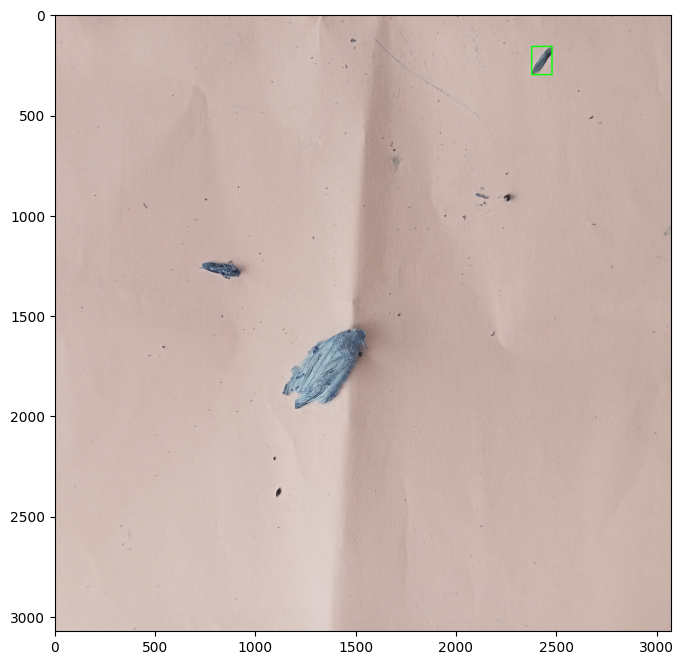

  0%|                                                                            | 1/140233 [00:01<49:33:36,  1.27s/it]

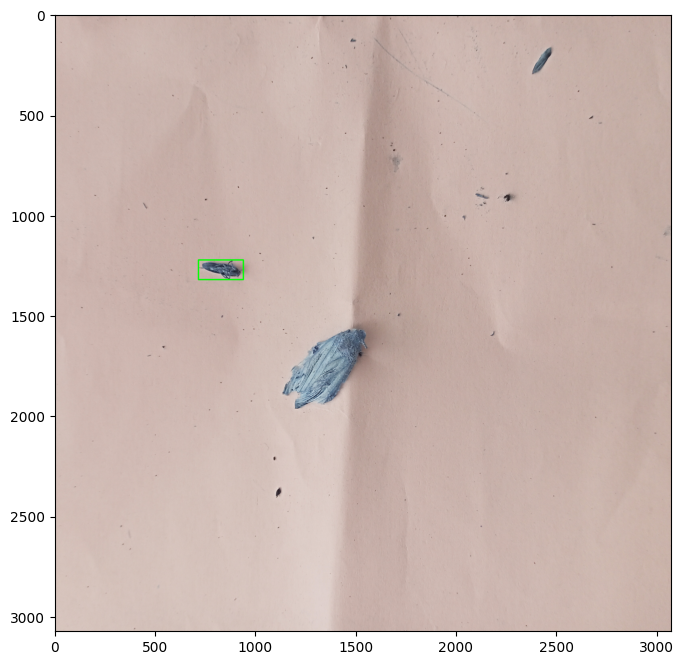

  0%|                                                                            | 2/140233 [00:02<52:11:20,  1.34s/it]

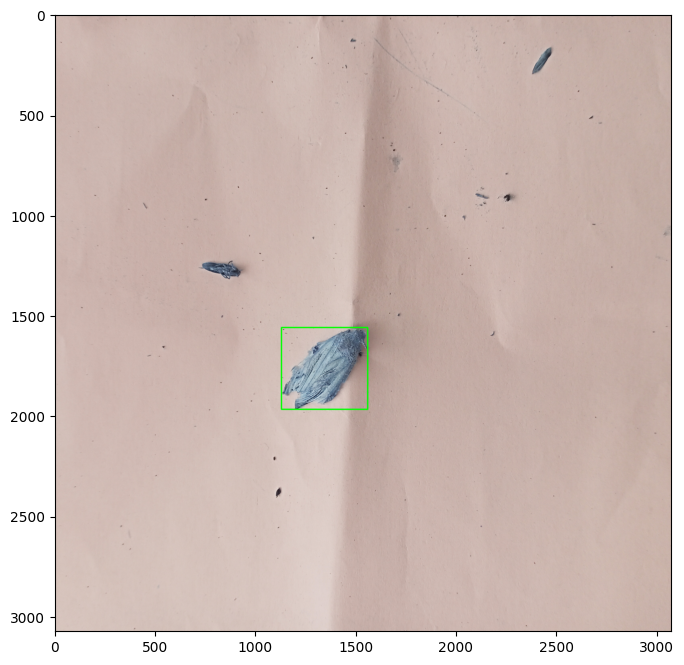

  0%|                                                                            | 3/140233 [00:04<52:15:53,  1.34s/it]

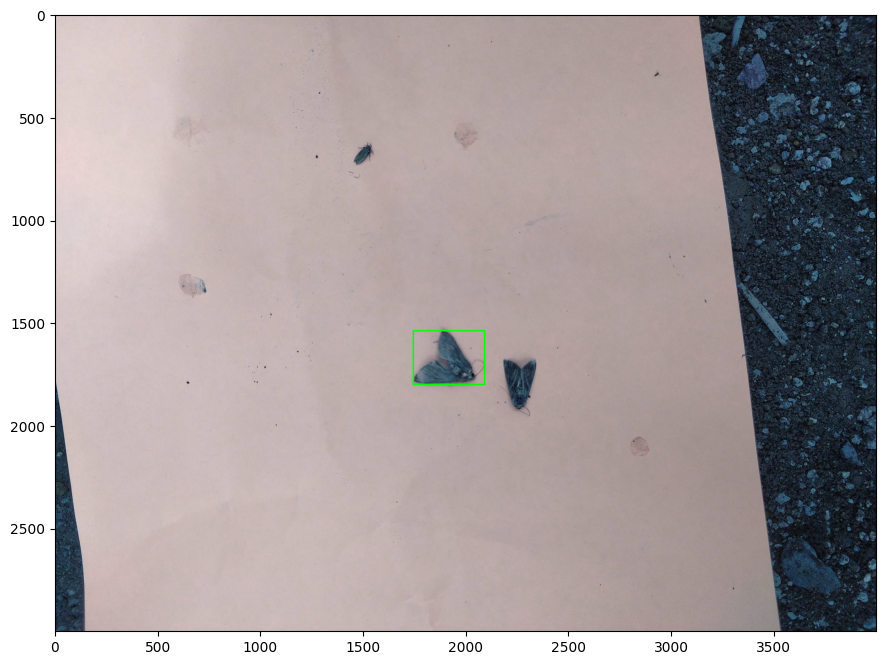

  0%|                                                                            | 4/140233 [00:05<55:42:04,  1.43s/it]

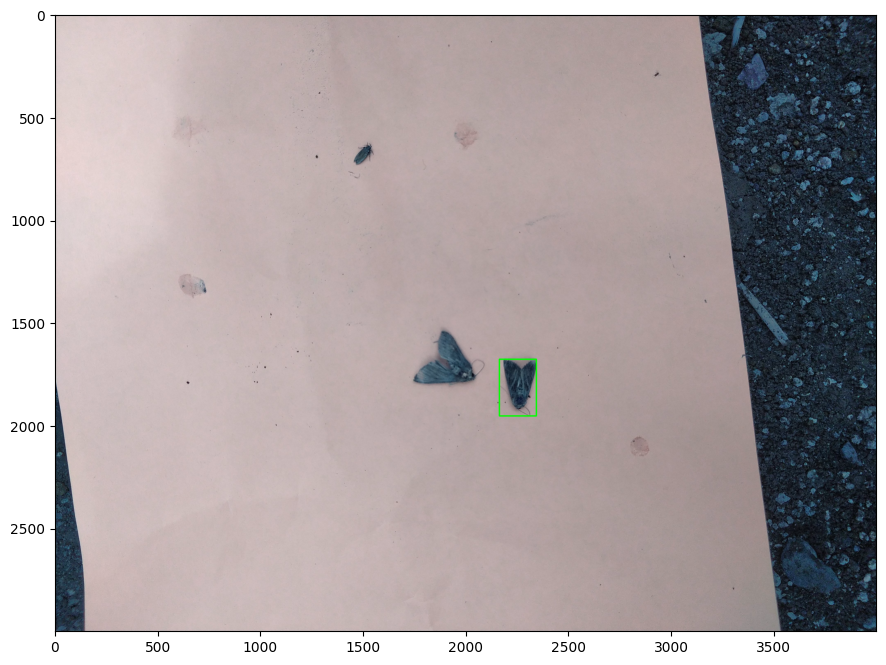

  0%|                                                                            | 5/140233 [00:07<57:41:22,  1.48s/it]

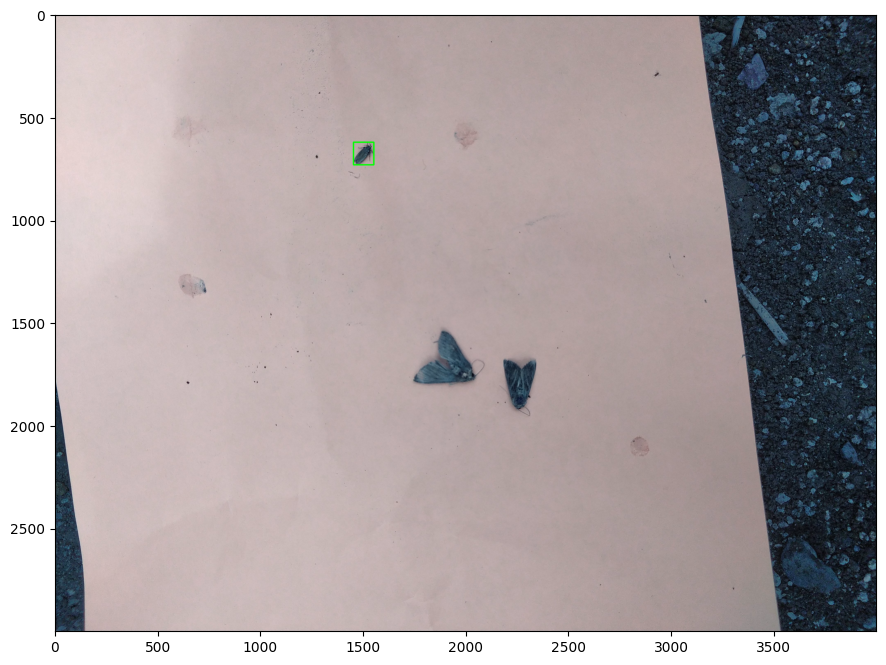

  0%|                                                                            | 6/140233 [00:08<58:55:17,  1.51s/it]

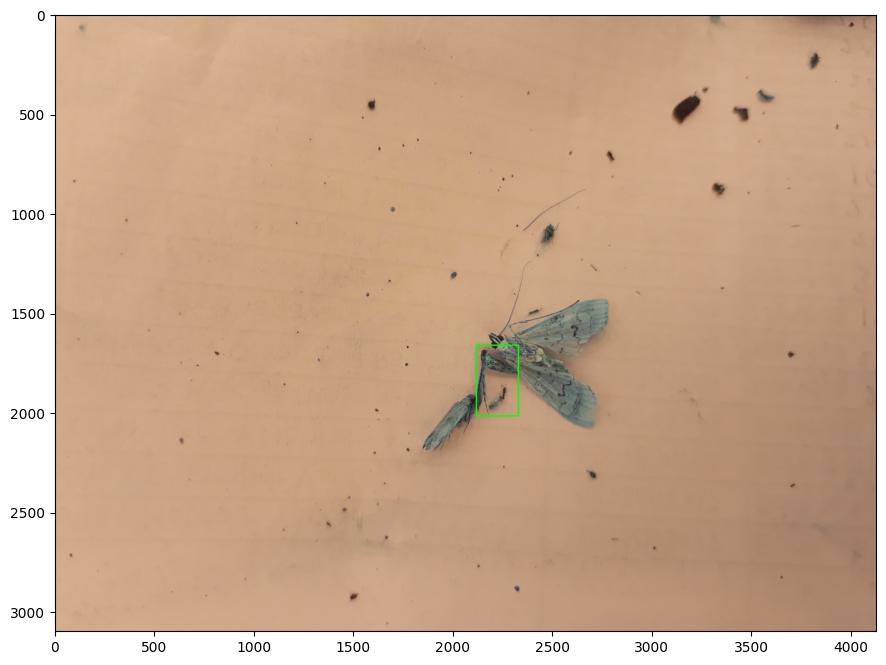

  0%|                                                                            | 7/140233 [00:10<61:00:22,  1.57s/it]

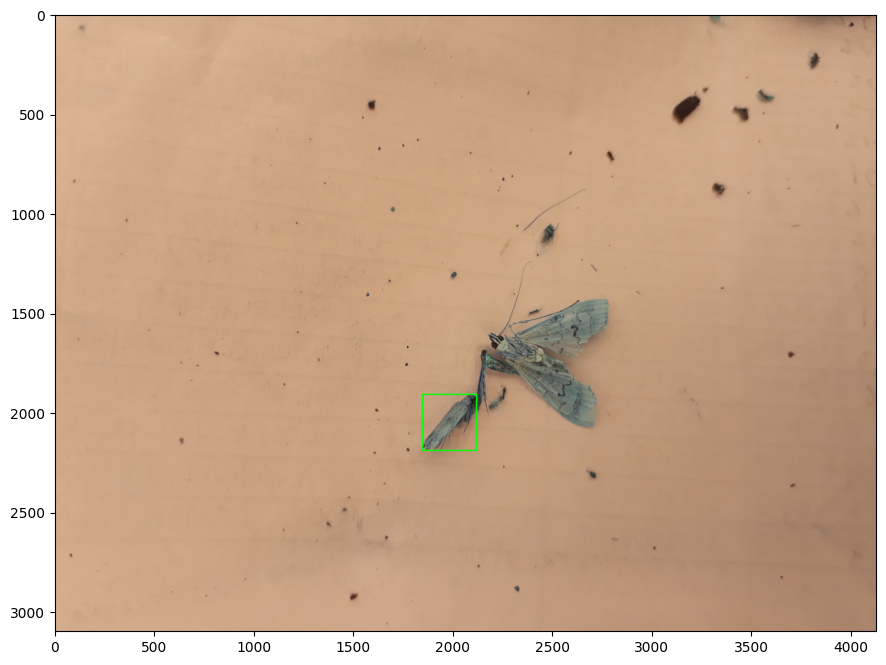

  0%|                                                                            | 8/140233 [00:11<60:30:04,  1.55s/it]

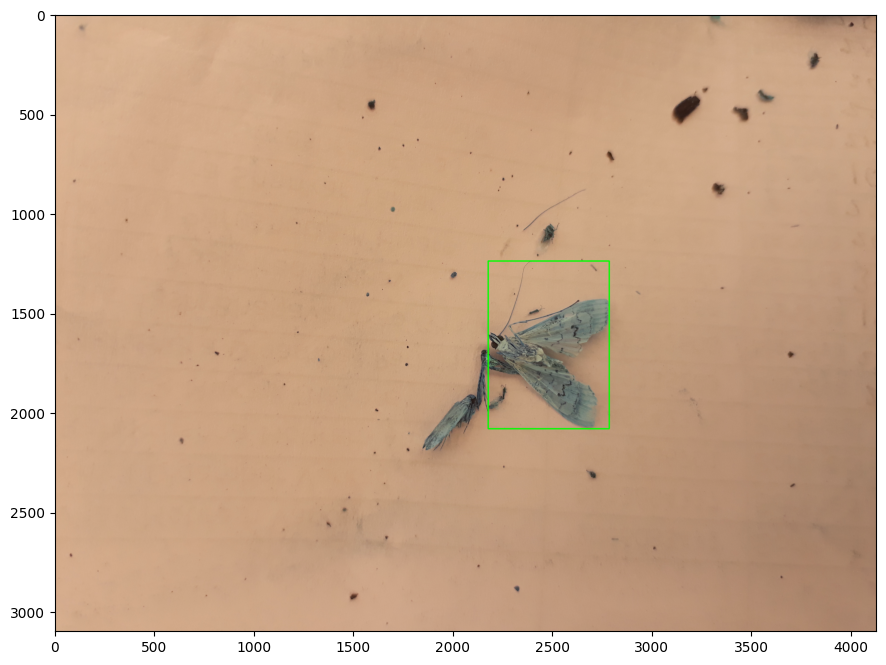

  0%|                                                                            | 9/140233 [00:13<60:31:09,  1.55s/it]

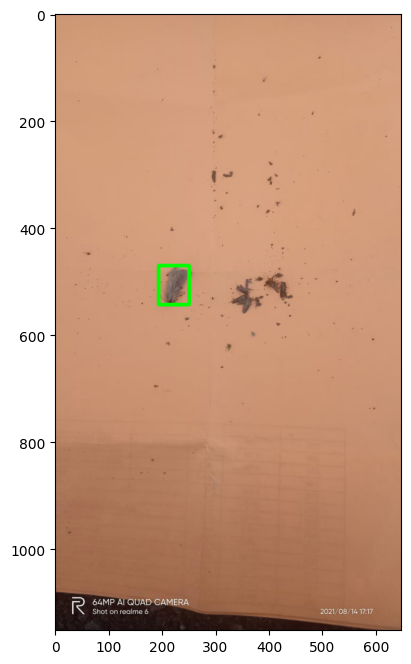

  0%|                                                                           | 10/140233 [00:13<44:32:58,  1.14s/it]

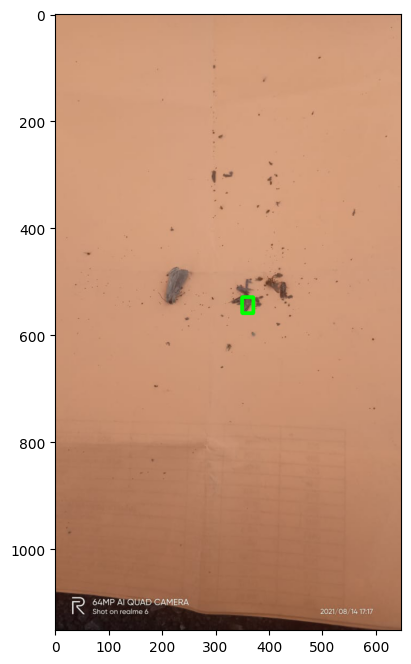

  0%|                                                                           | 10/140233 [00:13<54:15:03,  1.39s/it]


In [99]:
for i in tqdm(range(data2.shape[0])):
    p='images/'+data2['image_id'][i]
    #q='images/'+data2['image_id'][i+1]
    img = tf.keras.utils.load_img(p,target_size=None,color_mode='rgb')
    #cv2.imwrite(train['image_id_worm'][i] , img )
    img =asarray(img)
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #temp=i
#     while(p==q):
        
    wkt_string = data2.geometry[i]
    bbox = loads(wkt_string)
#         cv2.rectangle(img, (int(bbox.bounds[0]), int(bbox.bounds[1])), (int(bbox.bounds[2]), int(bbox.bounds[3])), (0, 255, 0), 5)
    draw_prediction(img,bbox.bounds)
        
#         q='images/'+data2['image_id'][temp]
#         temp+=1
  
    if(i==10):
        break
    if(p==q):
        continue


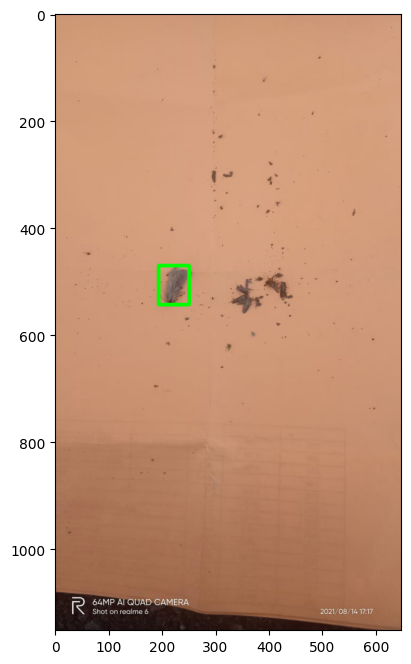

In [96]:
draw_prediction(img,bbox.bounds)

In [55]:
bbox.bounds[0]

2377.97

In [ ]:
# # read image
# img = cv2.imread('two_blobs.jpg')

# # convert to grayscale
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# # threshold
# thresh = cv2.threshold(gray,128,255,cv2.THRESH_BINARY)[1]

# # get contours
# result = img.copy()
# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours = contours[0] if len(contours) == 2 else contours[1]
# for cntr in contours:
#     x,y,w,h = cv2.boundingRect(cntr)
#     cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
#     print("x,y,w,h:",x,y,w,h)
 
#  # save resulting image
# cv2.imwrite('two_blobs_result.jpg',result)      

# # show thresh and result    
# cv2.imshow("bounding_box", result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [1]:
abw = pd.read_csv('abw.csv')  

NameError: name 'pd' is not defined

In [131]:
#(minx, miny, maxx, maxy)
def draw_prediction( img_array,gt_bb,wType):
    result = img_array
    if(wType=='abw'):
        color=(0, 255, 0)
    else:
        color=(250,20,60)
    cv2.rectangle(result, (int(gt_bb[0]), int(gt_bb[1])), (int(gt_bb[2]), int(gt_bb[3])), color, 5)
    #cv2.rectangle(result, (pred_bb['x1'], pred_bb['y1']), (pred_bb['x2'], pred_bb['y2']), (255, 0, 0), 5)
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.show()

#     img_path = os.path.join('imgs', img_url.split('/')[-1])
#     img = cv2.imread(img_path)
    
    

  0%|                                                                                       | 0/140233 [00:00<?, ?it/s]

pbw


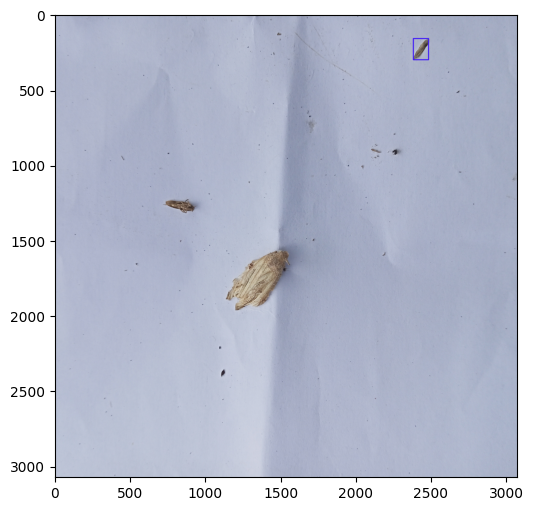

  0%|                                                                            | 1/140233 [00:01<41:42:48,  1.07s/it]

pbw


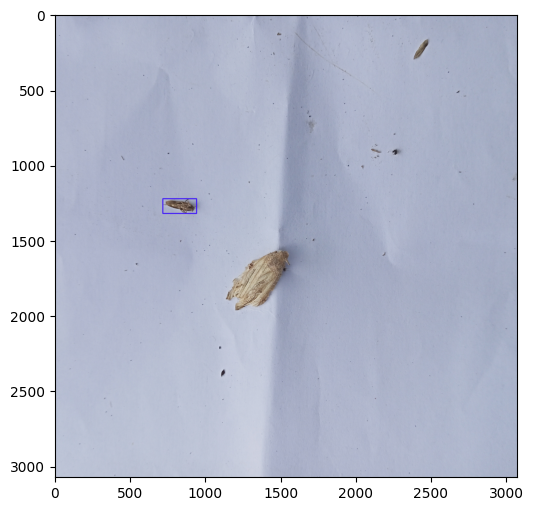

  0%|                                                                            | 2/140233 [00:02<41:28:48,  1.06s/it]

abw


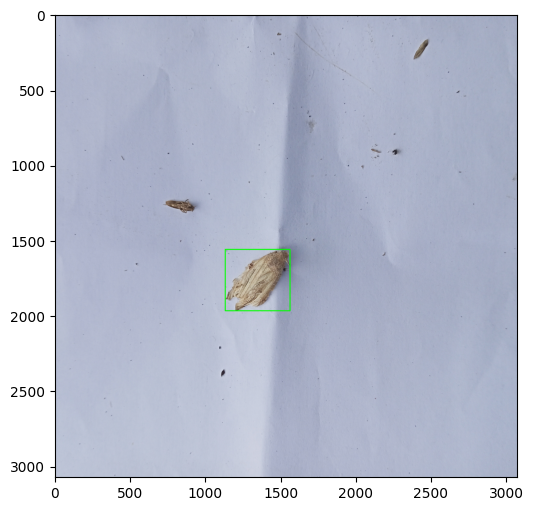

  0%|                                                                            | 3/140233 [00:03<44:04:39,  1.13s/it]

abw


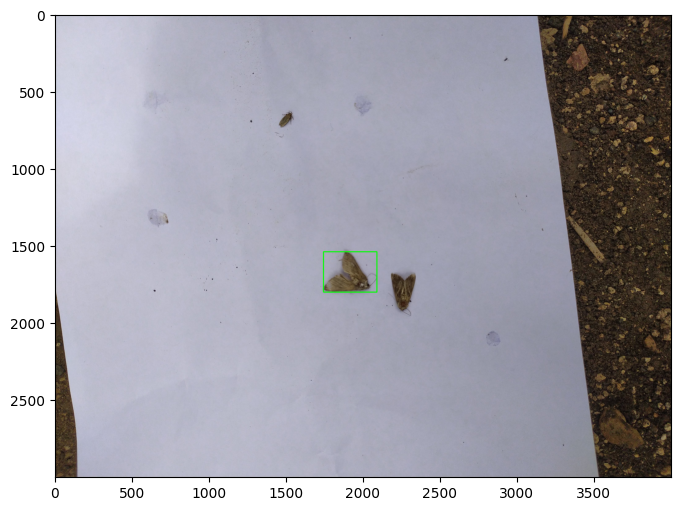

  0%|                                                                            | 4/140233 [00:04<49:02:02,  1.26s/it]

abw


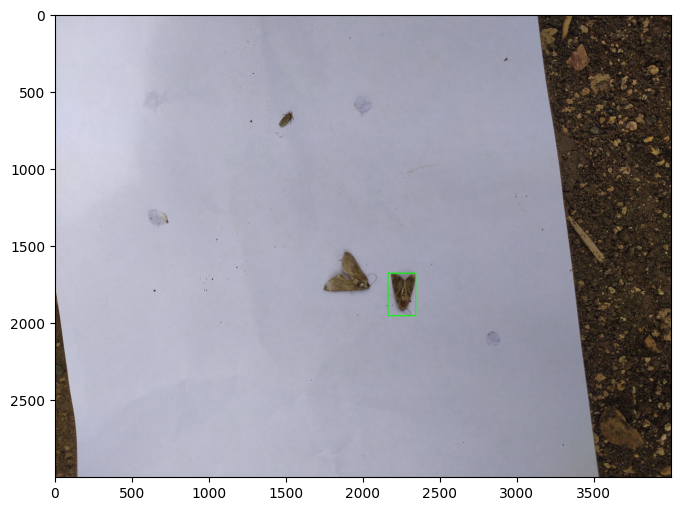

  0%|                                                                            | 5/140233 [00:06<50:46:12,  1.30s/it]

pbw


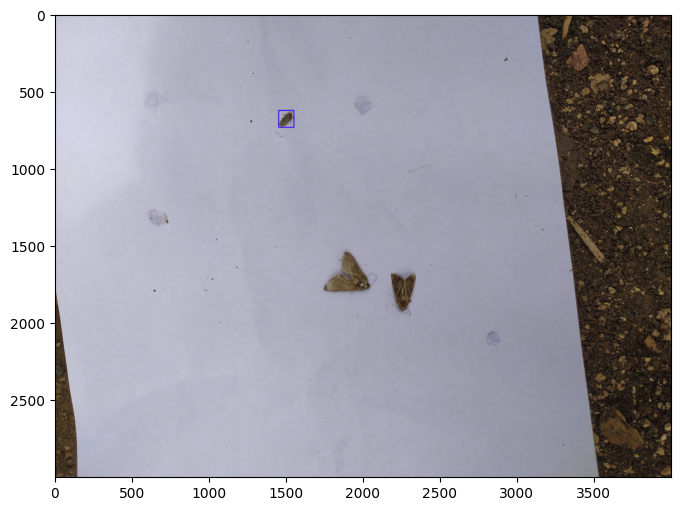

  0%|                                                                            | 5/140233 [00:07<59:04:59,  1.52s/it]


In [133]:
for i in tqdm(range(data2.shape[0])):
    p='images/'+data2['image_id'][i]
    #q='images/'+data2['image_id'][i+1]
    img = cv2.imread(p)
    img =asarray(img)
    
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    wkt_string = data2.geometry[i]
    bbox = loads(wkt_string)
    print(data2.worm_type[i])
    draw_prediction(img,bbox.bounds,data2.worm_type[i])
    
        
    #plt.show()
    if(i==5):
        break